In [71]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import resize

In [72]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    features = hog.compute(gray)
    return features.flatten()

In [73]:
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = []
    for root,dirs,files, in os.walk(directory):
        for class_name in dirs:
            class_dir = os.path.join(root, class_name)
            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                image = cv2.imread(img_path)
                
                if image is not None:
                    images.append(image)
                    labels.append(class_name)
                    class_names.append(class_name)
    return images, labels, class_names

In [74]:
def visualize_class_distribution(labels, class_names):
    class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    total_samples = sum(class_counts.values())
    
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f'{class_name}: {count} samples ({percentage:.2f}%)')

In [75]:
directory = 'dataset200/train'

In [76]:
images,labels,class_names = load_images_from_directory(directory)

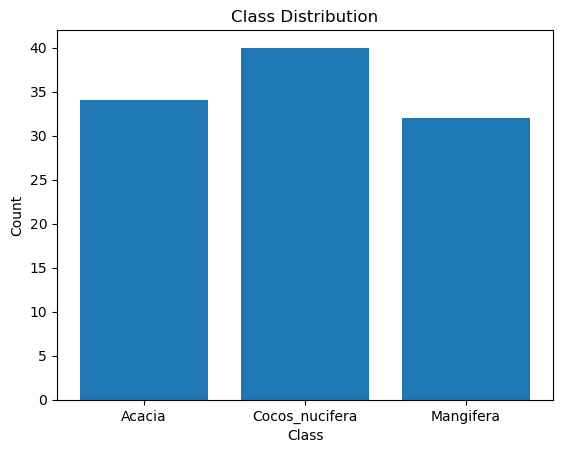

Acacia: 34 samples (32.08%)
Cocos_nucifera: 40 samples (37.74%)
Mangifera: 32 samples (30.19%)


In [77]:
visualize_class_distribution(labels, class_names)

In [78]:
features = np.array([extract_features(img) for img in images])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [80]:
svm_classifier = SVC(kernel='linear')

In [81]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [82]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [84]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM: accuracy score: {accuracy_svm*100:.2f}')

SVM: accuracy score: 95.45


In [85]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'RFC: accuracy score: {accuracy_rfc*100:.2f}')

RFC: accuracy score: 68.18


# Pre processing grayscale and resize

In [86]:
def preprocess_image(image_path, save_path):
    image = cv2.imread(image_path)

    resized_image = cv2.resize(image, (200, 266))

    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(save_path, grayscale_image)

    return grayscale_image

In [91]:
input_image_path = 'dataset200/val/Cocos_nucifera/IMG_3469.jpg'
save_path = 'pre_process.jpg'

preprocessed_image = preprocess_image(input_image_path, save_path)

In [94]:
input_image = cv2.imread('pre_process.jpg')

if input_image is not None:
    input_features = extract_features(input_image).reshape(1,-1)
    svm_pred = svm_classifier.predict(input_features)[0]
    rfc_pred = rfc.predict(input_features)[0]
    
    print(f'SVM PRED: {svm_pred}')
    print(f'RFC PRED: {rfc_pred}')
    
else:
    print("Error unable to read input message")
    

SVM PRED: Cocos_nucifera
RFC PRED: Cocos_nucifera
